In [1]:
#..................import library and module...........................
import tensorflow as tf

from keras import backend as K
from keras.models import Model
from keras.layers import (Input, Lambda, BatchNormalization,LSTM,TimeDistributed,Activation,Dense)
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint   
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import os 

  
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import random

Using TensorFlow backend.


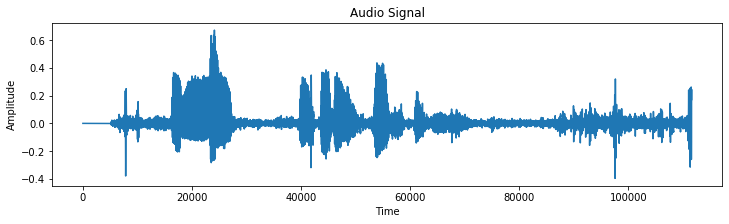

In [2]:
audio_file="E:/speech_recognition/ssl/itrat_a.wav"

# .........................load audio files with librosa....................
audio,sr = librosa.load(audio_file)

#.............plot raw audio...........................
def plot_raw_audio(vis_raw_audio):
    # plot the raw audio signal
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot(111)
    steps = len(vis_raw_audio)
    ax.plot(np.linspace(1, steps, steps), vis_raw_audio)
    plt.title('Audio Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
plot_raw_audio(audio)

In [3]:
#.........................data preprocessing.........................................

In [4]:
#..........fixed the seed................
def reset_random_seeds():
    seed_num=9
    os.environ['PYTHONHASHSEED']=str(seed_num)
    tf.random.set_seed(seed_num)
    np.random.seed(seed_num)
    random.seed(seed_num)

In [5]:
def get_labels():
    labels =[   "সানলাইট ব্যাটারি পাঁচপিস",
                "সান চিপস্ একপিস",
                "সানলাইট ব্যাটারি চারপিস",
                "সানলাইট ব্যাটারি একপিস",
                "ওয়েব এয়ার ফ্রেসনার চারপিস",
                "সান ড্রিংকিং ওয়াটার তিনপিস",
                "ওয়েব এয়ার ফ্রেসনার পাঁচপিস",
                "ওয়েব এয়ার ফ্রেসনার পাঁচপিস",
                "ওয়েব এয়ার ফ্রেসনার চারপিস",
                "ওয়েব এয়ার ফ্রেসনার দুইপিস",
                "সান ড্রিংকিং ওয়াটার চারপিস",
                "সানলাইট ব্যাটারি পাঁচপিস",
                "সান চিপস তিনপিস",
                "ওয়েব বডি স্প্রে পাঁচপিস",
                "সান ড্রিংকিং ওয়াটার তিনপিস",
                "সানলাইট ব্যাটারি দুইপিস",
                "ওয়েব এয়ার ফ্রেসনার একপিস",
                "ওয়েব বডি স্প্রে একপিস",
                "সান ড্রিংকিং ওয়াটার দুইপিস",
                "সানলাইট ব্যাটারি তিনপিস",
                "সান চিপস পাঁচ পিস",
                "সান ড্রিংকিং ওয়াটার পাঁচপিস",
                "সান চিপস পাঁচপিস",
                "সান চিপস চারপিস",
                "সানলাইট ব্যাটারি চারপিস",
                "ওয়েব বডি স্প্রে চারপিস",
                "ওয়েব বডি স্প্রে দুইপিস",
                "ওয়েব এয়ার ফ্রেসনার একপিস",
                "ওয়েব বডি স্প্রে চারপিস",
                "সান চিপস পাঁচপিস",
                "সানলাইট ব্যাটারি তিনপিস",
                "সান চিপস দুইপিস",
                "সান ড্রিংকিং ওয়াটার একপিস",
                "সান চিপস একপিস",
                "সান ড্রিংকিং ওয়াটার তিনপিস",
                "ওয়েব এয়ার ফ্রেসনার চারপিস",
                 "সানলাইট ব্যাটারি পাঁচপিস",
                 "ওয়েব বডি স্প্রে পাঁচপিস",
                 "সান ড্রিংকিং ওয়াটার চারপিস",
                  "সানলাইট ব্যাটারি একপিস",
                 "সান ড্রিংকিং ওয়াটার একপিস",
                  "সান ড্রিংকিং ওয়াটার দুইপিস",
                "ওয়েব এয়ার ফ্রেসনার পাঁচপিস",
                "ওয়েব বডি স্প্রে চারপিস",
                "সানলাইট ব্যাটারি তিনপিস",
                "ওয়েব বডি স্প্রে একপিস",
                "সান ড্রিংকিং ওয়াটার তিনপিস",
                "ওয়েব বডি স্প্রে তিনপিস",
                "ওয়েব এয়ার ফ্রেসনার একপিস"] 
    #labels=os.listdir(path)
    print(len(labels))
    label_indices = np.arange(0, len(labels))
    print(label_indices)
    return labels, label_indices

In [6]:
#data_path="E:/speech_recognition/data/"
labels,label_indices=get_labels()
print(labels)

49
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
['সানলাইট ব্যাটারি পাঁচপিস', 'সান চিপস্ একপিস', 'সানলাইট ব্যাটারি চারপিস', 'সানলাইট ব্যাটারি একপিস', 'ওয়েব এয়ার ফ্রেসনার চারপিস', 'সান ড্রিংকিং ওয়াটার তিনপিস', 'ওয়েব এয়ার ফ্রেসনার পাঁচপিস', 'ওয়েব এয়ার ফ্রেসনার পাঁচপিস', 'ওয়েব এয়ার ফ্রেসনার চারপিস', 'ওয়েব এয়ার ফ্রেসনার দুইপিস', 'সান ড্রিংকিং ওয়াটার চারপিস', 'সানলাইট ব্যাটারি পাঁচপিস', 'সান চিপস তিনপিস', 'ওয়েব বডি স্প্রে পাঁচপিস', 'সান ড্রিংকিং ওয়াটার তিনপিস', 'সানলাইট ব্যাটারি দুইপিস', 'ওয়েব এয়ার ফ্রেসনার একপিস', 'ওয়েব বডি স্প্রে একপিস', 'সান ড্রিংকিং ওয়াটার দুইপিস', 'সানলাইট ব্যাটারি তিনপিস', 'সান চিপস পাঁচ পিস', 'সান ড্রিংকিং ওয়াটার পাঁচপিস', 'সান চিপস পাঁচপিস', 'সান চিপস চারপিস', 'সানলাইট ব্যাটারি চারপিস', 'ওয়েব বডি স্প্রে চারপিস', 'ওয়েব বডি স্প্রে দুইপিস', 'ওয়েব এয়ার ফ্রেসনার একপিস', 'ওয়েব বডি স্প্রে চারপিস', 'সান চিপস পাঁচপিস', 'সানলাইট ব্যাটারি তিনপিস', 'সান চিপস দুইপিস', 'সান ড্

In [7]:
#read label text from folder text file
file="E:/ssl_speech_recognition/data/bangla_text_new.txt"
with open(file,encoding="utf8") as f:
    lines = f.readlines()
    #lines=lines.replace("\n", "")
#print(lines)

In [8]:
# ............Mel-frequency cepstral coefficients..........................
def wav2mfcc(file_path,max_len, n_mfcc):
    wave, sr = librosa.load(file_path, mono=True, sr=5000)
    #print(wave)
     
    wave = np.asfortranarray(wave[::3])
    #print(wave)
    #print(sr)
    mfcc = librosa.feature.mfcc(wave,sr=sr,n_mfcc=n_mfcc) #sr means smapling rate=16000
    #print(mfcc.shape[0],mfcc.shape[1])
    
    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc,wave

In [9]:
from tkinter import Tcl

def save_data_to_array(path, max_len, n_mfcc):
    #labels,_, _ = get_labels()

    #for label in labels:
        # Init mfcc vectors
   
    #read audio file
    audio=[]
    for wav in path:
        wavfile=f'E:/ssl_speech_recognition/data/wav_data/{wav}'
        #wavfile=Tcl().call('lsort', '-dict',wavfile)
        #print(wavfile)
        audio.append(wavfile)
    
    #.............sort audio file.......
    sort_audio=Tcl().call('lsort', '-dict',audio) 
    #print(sort_audio)
    
    mfcc_vectors = []
    for i in sort_audio:
        mfcc,wave= wav2mfcc(i, max_len, n_mfcc)
        mfcc_vectors.append(mfcc)
    #np.save('E:/speech_recognition/wav', mfcc_vectors)
    return mfcc_vectors,wave,audio

In [10]:
root_dir=os.listdir("E:/ssl_speech_recognition/data/wav_data/")
mfcc_vec,wave,audio=save_data_to_array(root_dir,384,34) #34 means time frequency and 384 amplitude
print(mfcc_vec[0].shape[0])

34


In [11]:
data={"mfcc":mfcc_vec,
      "utterance":labels}
final_df=pd.DataFrame(data,columns=['mfcc',"utterance"])
final_df.head()

,mfcc,utterance
0,"[[-619.2729, -436.17197, -330.97867, -246.7211...",সানলাইট ব্যাটারি পাঁচপিস
1,"[[-461.25485, -261.74872, -91.62297, -60.88139...",সান চিপস্ একপিস
2,"[[-560.6463, -423.7601, -355.2743, -336.97134,...",সানলাইট ব্যাটারি চারপিস
3,"[[-603.0319, -481.93503, -212.11751, -71.35475...",সানলাইট ব্যাটারি একপিস
4,"[[-537.3139, -420.37527, -310.9997, -138.40799...",ওয়েব এয়ার ফ্রেসনার চারপিস


In [12]:
print(final_df.shape)

(49, 2)


In [13]:
#..........clean text labels like html tags,quotation etc.............
#text= ' '.join([str(elem) for elem in lines])
#text
#text=text.replace("\n", "")
#text=text.replace('\ufeff'," ")
#text=text.replace(" ' "," ")
#text=text.replace('[\\|!|?|\'|"|#|,|.|)|(|\|/|""|]',' ')
#text=[text]
#print(text)
import re
def clean(text):
    text=text.map(lambda i:re.sub(r'[\\|!|?|\'|"|#|,|.|)|(|\|/|""|\n|]',r' ',str(i)))
    return text

In [14]:
data_1={"mfcc":mfcc_vec,
      "utterance":lines}
final_df_1=pd.DataFrame(data_1,columns=['mfcc',"utterance"])
final_df_1["utterance"]=clean(final_df_1["utterance"])
final_df_1.head(5)

,mfcc,utterance
0,"[[-619.2729, -436.17197, -330.97867, -246.7211...",﻿ সানলাইট ব্যাটারি পাঁচপিস
1,"[[-461.25485, -261.74872, -91.62297, -60.88139...",সান চিপস্ একপিস
2,"[[-560.6463, -423.7601, -355.2743, -336.97134,...",সানলাইট ব্যাটারি চারপিস
3,"[[-603.0319, -481.93503, -212.11751, -71.35475...",সানলাইট ব্যাটারি একপিস
4,"[[-537.3139, -420.37527, -310.9997, -138.40799...",ওয়েব এয়ার ফ্রেসনার চারপিস


In [15]:
#convert bangla character to number value
char_map_str = """
ঀ 0
ঁ 1
ং 2
ঃ 3
অ 4
আ 5
ই 6
ঈ 7
উ 8
ঊ 9
ঋ 10
ঌ 11
এ 12
ঐ 13
ও 14
ঔ 15
ক 16
খ 17
গ 18
ঘ 19
ঙ 20
চ 21
ছ 22
জ 23
ঝ 24
ঞ 25
ট 26
ঠ 27
ড 28
ঢ 29
ণ 30
ত 31
থ 32
দ 33
ধ 34
ন 35
প 36
ফ 37
ব 38
ভ 39
ম 40
য 41
র 42
ল 43
শ 44
ষ 45
স 46
হ 47
় 48
ঽ 49
া 50
ি 51
ী 52
ু 53
ূ 54
ৃ 55
ৄ 56
ে 57
ৈ 58
ো 59
ৌ 60
্ 61
ৎ 62
ৗ 63
ড় 64
ঢ় 65
য় 66
ৠ 67
০ 68
১ 69
২ 70
৩ 71
৪ 72
৫ 73
৬ 74
৭ 75
৮ 76
৯ 77
ৱ 78
৲ 79
৴ 80
<SPACE> 81
"""
# the "blank" character is mapped to 84
char_map = {}
index_map = {}
for line in char_map_str.strip().split('\n'):
    ch, index = line.split()
    char_map[ch] = int(index)
    index_map[int(index)] = ch
index_map[81] = ' '

In [16]:
print(char_map)
print("****************************************************")
print(index_map)

{'ঀ': 0, 'ঁ': 1, 'ং': 2, 'ঃ': 3, 'অ': 4, 'আ': 5, 'ই': 6, 'ঈ': 7, 'উ': 8, 'ঊ': 9, 'ঋ': 10, 'ঌ': 11, 'এ': 12, 'ঐ': 13, 'ও': 14, 'ঔ': 15, 'ক': 16, 'খ': 17, 'গ': 18, 'ঘ': 19, 'ঙ': 20, 'চ': 21, 'ছ': 22, 'জ': 23, 'ঝ': 24, 'ঞ': 25, 'ট': 26, 'ঠ': 27, 'ড': 28, 'ঢ': 29, 'ণ': 30, 'ত': 31, 'থ': 32, 'দ': 33, 'ধ': 34, 'ন': 35, 'প': 36, 'ফ': 37, 'ব': 38, 'ভ': 39, 'ম': 40, 'য': 41, 'র': 42, 'ল': 43, 'শ': 44, 'ষ': 45, 'স': 46, 'হ': 47, '়': 48, 'ঽ': 49, 'া': 50, 'ি': 51, 'ী': 52, 'ু': 53, 'ূ': 54, 'ৃ': 55, 'ৄ': 56, 'ে': 57, 'ৈ': 58, 'ো': 59, 'ৌ': 60, '্': 61, 'ৎ': 62, 'ৗ': 63, 'ড়': 64, 'ঢ়': 65, 'য়': 66, 'ৠ': 67, '০': 68, '১': 69, '২': 70, '৩': 71, '৪': 72, '৫': 73, '৬': 74, '৭': 75, '৮': 76, '৯': 77, 'ৱ': 78, '৲': 79, '৴': 80, '<SPACE>': 81}
****************************************************
{0: 'ঀ', 1: 'ঁ', 2: 'ং', 3: 'ঃ', 4: 'অ', 5: 'আ', 6: 'ই', 7: 'ঈ', 8: 'উ', 9: 'ঊ', 10: 'ঋ', 11: 'ঌ', 12: 'এ', 13: 'ঐ', 14: 'ও', 15: 'ঔ', 16: 'ক', 17: 'খ', 18: 'গ', 19: 'ঘ', 20: 'ঙ', 21: 'চ', 22: 'ছ', 23: 'জ', 24: '

In [17]:
def get_number_of_char_classes(char_map):
    ## TODO would be better to check with dataset (once cleaned)
    num_classes = len(char_map)+1 #need +1 for ctc null char +1 pad
    return num_classes
get_number_of_char_classes(char_map)

83

In [18]:
def text_to_int_sequence(text):
    """ Convert text to an integer sequence """
    int_sequence = []
    for c in text:
        if c == ' ':
            ch = char_map['<SPACE>']
        else:
            ch = char_map[c]
        int_sequence.append(ch)
    return int_sequence

def int_sequence_to_text(int_sequence):
    """ Convert an integer sequence to text """
    text = []
    for c in int_sequence:
        ch = index_map[c]
        text.append(ch)
    return text

In [19]:
#...........normalize the feature...............
def calc_feat_dim(window, max_freq):
    return int(0.001 * window * max_freq) + 1

def normalize_feature(feature, eps=1e-14):
         
        #feat_dim = calc_feat_dim(34,8000)
        #feats_mean = np.zeros((feat_dim,))
        #feats_std = np.ones((feat_dim,))
        
        feats = np.vstack(feature)
        feats_mean = np.mean(feats, axis=0)
        feats_std = np.std(feats, axis=0)
        
        return (feature - feats_mean) / (feats_std + eps)

In [20]:
#.........data preparation for model........
from past.builtins import xrange

def map_input_data(final_df):
    
    max_length = max([x.shape[0] for x in final_df['mfcc']])
    max_string_length = max([len(x) for x in final_df['utterance']])
    #print(max_string_length)
    X_data = np.zeros([final_df.shape[0], max_length,384]) #here 384 means input shape
    #print(X_data)
    labels = np.ones([final_df.shape[0], max_string_length])*81
    input_length = np.zeros([final_df.shape[0], 1])
    label_length = np.zeros([final_df.shape[0], 1])
    #print(len(label_length))
    for i in range(0, final_df.shape[0]):
        feat = final_df.iloc[i]['mfcc']
        input_length[i] = feat.shape[0]
        #print(input_length)
        X_data[i, :feat.shape[0], :] = feat
        #print(X_data[i, :feat.shape[0], :])
        #print(len(final_df.iloc[i]['utterance']))
        # calculate labels & label_length
        #label = np.array(final_df.iloc[i]['utterance'])
        y=final_df.iloc[i]['utterance']
        #y=[' '.join(y[i:i+19]) for i in xrange(0,len(y),19)]                                                  
        print(y)
        label=np.array(text_to_int_sequence(y))
        print((label))
        print(len(label))
        labels[i, :len(label)] = label
        #if feat.shape[0]<=len(label):
            #print(feat.shape[0])
            #label_length[i]=[' '.join(str(label[i:i+19])) for i in range(0,len(label),19)] 
        label_length[i] = len(label)

    #print(X_data)
    X_data=normalize_feature(X_data,eps=1e-14)
    # return the arrays
    outputs = {'ctc': np.zeros([final_df.shape[0]])}
    #outputs = {'ctc': np.zeros(20)}
    outputs_1 = {'ctc': np.zeros([final_df.shape[0]])[2:3]}
    #outputs={'labels': np.asarray(labels),
             #'label_length':np.asarray(label_length)}
        
    inputs = {'input': X_data,   
              'labels': labels,
              'input_length':input_length ,
              'label_length':label_length
              }
    inputs_1 = {'input': X_data[2:3],   
              'labels': labels[2:3],
                 'input_length':input_length[2:3] ,
                  'label_length':label_length[2:3]
              }
    
    #return (inputs,outputs),(inputs_1,outputs_1),X_data,labels,input_length,label_length
    return (inputs,outputs) 

In [21]:
(input_dict,outputs)=map_input_data(final_df)

সানলাইট ব্যাটারি পাঁচপিস
[46 50 35 43 50  6 26 81 38 61 41 50 26 50 42 51 81 36 50  1 21 36 51 46]
24
সান চিপস্ একপিস
[46 50 35 81 21 51 36 46 61 81 12 16 36 51 46]
15
সানলাইট ব্যাটারি চারপিস
[46 50 35 43 50  6 26 81 38 61 41 50 26 50 42 51 81 21 50 42 36 51 46]
23
সানলাইট ব্যাটারি একপিস
[46 50 35 43 50  6 26 81 38 61 41 50 26 50 42 51 81 12 16 36 51 46]
22
ওয়েব এয়ার ফ্রেসনার চারপিস
[14 66 57 38 81 12 66 50 42 81 37 61 42 57 46 35 50 42 81 21 50 42 36 51
 46]
25
সান ড্রিংকিং ওয়াটার তিনপিস
[46 50 35 81 28 61 42 51  2 16 51  2 81 14 66 50 26 50 42 81 31 51 35 36
 51 46]
26
ওয়েব এয়ার ফ্রেসনার পাঁচপিস
[14 66 57 38 81 12 66 50 42 81 37 61 42 57 46 35 50 42 81 36 50  1 21 36
 51 46]
26
ওয়েব এয়ার ফ্রেসনার পাঁচপিস
[14 66 57 38 81 12 66 50 42 81 37 61 42 57 46 35 50 42 81 36 50  1 21 36
 51 46]
26
ওয়েব এয়ার ফ্রেসনার চারপিস
[14 66 57 38 81 12 66 50 42 81 37 61 42 57 46 35 50 42 81 21 50 42 36 51
 46]
25
ওয়েব এয়ার ফ্রেসনার দুইপিস
[14 66 57 38 81 12 66 50 42 81 37 61 42 57 46 35 50 42 81 33 53  6 

In [22]:
print(input_dict)

{'input': array([[[-6.92902637e+00, -6.84368749e+00, -7.15051889e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.45038053e-01,  1.09349928e+00,  1.96077695e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.98290679e-01, -5.60504655e-02, -2.54978683e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 1.84996015e-01,  2.05578755e-01,  2.16658265e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.41045286e-01,  2.05353629e-01,  1.90949851e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.73056853e-01,  2.08175758e-01,  2.01542136e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-5.11783223e+00, -4.03246238e+00, -1.83971512e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.02782496e-01,  3.42410759e-01,  2.12927144e-01, ...,
          0.00000000e+00,  0

In [23]:
print(outputs)

{'ctc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}


In [24]:
#define ctc_lambda and ctc cost function
def ctc_lambda_func(args):
    #import tensorflow as tf
    
    y_pred, labels, input_length, label_length = args
    #y_pred = y_pred[:, 2:, :]
    #print(y_pred.shape)
    #print(input_length)
    #print(labels.shape)
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
    #return tf.compat.v1.nn.ctc_loss(labels, y_pred, input_length,label_length,
                                    #ignore_longer_outputs_than_inputs=True)

def add_ctc_loss(input_to_softmax):
    the_labels = Input(name='labels', shape=(None,), dtype='float32')
    input_lengths = Input(name='input_length', shape=(1,), dtype='int64')
    label_lengths = Input(name='label_length', shape=(1,), dtype='int64')
    output_lengths = Lambda(input_to_softmax.output_length)(input_lengths)
    print(output_lengths)
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')(
    [input_to_softmax.output, the_labels, output_lengths, label_lengths])
    model = Model(
        inputs=[input_to_softmax.input, the_labels, input_lengths,label_lengths],
        outputs=loss_out)
    return model


In [25]:
#.............................model-2...........................................
from keras.layers import Dense, Activation, Bidirectional, Reshape, Flatten, Lambda, Input,\
    Masking, Convolution1D, BatchNormalization, GRU, Conv1D, RepeatVector, Conv2D,Dropout
from keras.optimizers import SGD, adam

def final_model_1(input_dim, filters,kernel_size,conv_stride,
                  conv_border_mode,output_dim,number_of_layers,units):
    """ Build a deep network for speech 
    """
    dropout_rate=0.5
    cell=GRU 
    activation='tanh'
    
    # Main acoustic input
    input_data = Input(name='input', shape=(None, input_dim))
    # TODO: Specify the layers in your network
    conv_1d = Conv1D(filters, kernel_size,
                     strides=conv_stride,
                     padding=conv_border_mode,
                     activation='relu',
                     name='layer_1_conv',
                     dilation_rate=1)(input_data)
    conv_bn = BatchNormalization(name='conv_batch_norm')(conv_1d)
    
    #conv_bn=Dropout(0.25)(conv_bn)
    if number_of_layers == 1:
        layer = cell(units, activation=activation,
                     return_sequences=True, implementation=2, name='rnn_1', dropout=dropout_rate)(conv_bn)
        layer = BatchNormalization(name='bt_rnn_1')(layer)
        #layer=Dropout(0.25)(layer)
    else:
        layer = cell(units, activation=activation,
                     return_sequences=True, implementation=2, name='rnn_1', dropout=dropout_rate)(conv_bn)
        
        layer = BatchNormalization(name='bt_rnn_1')(layer)
        #layer=Dropout(0.25)(layer)

        for i in range(number_of_layers - 2):
            layer = cell(units, activation=activation,
                         return_sequences=True, implementation=2, name='rnn_{}'.format(i + 2), dropout=dropout_rate)(layer)
            
            layer = BatchNormalization(name='bt_rnn_{}'.format(i + 2))(layer)

        layer = cell(units, activation=activation,
                     return_sequences=True, implementation=2, name='final_layer_of_rnn')(layer)
        #layer=Dropout(0.25)(layer)
        layer = BatchNormalization(name='bt_rnn_final')(layer)

    time_dense = TimeDistributed(Dense(output_dim))(layer)
    time_dense=Dropout(0.5)(time_dense)
    # TODO: Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    # TODO: Specify model.output_length
    #model=add(Dropout(0.5))
    model.output_length = lambda x:x
                           #cnn_output_length(x, kernel_size,conv_border_mode, conv_stride)
    print(model.summary())
    return model

In [26]:
def train_model(X,Y,optimizer=SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5),epochs=20,verbose=1):
    import tensorflow as tf
    import math
    
    reset_random_seeds()
    #model_1 = deep_rnn_model(input_dim=384)
    model_1= final_model_1(input_dim=384,filters=200,kernel_size=1,conv_stride=1,
                                                    conv_border_mode='valid',
                                                    output_dim=83,
                                                    number_of_layers=1,
                                                    units=200)
    model=model_1
    model = add_ctc_loss(model)
    model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer)
    #model.compile(loss=ctc, optimizer=optimizer)
    #model.compile(loss=tf.compat.v1.nn.ctc_loss(the_labels=ctc,
                            #ignore_longer_outputs_than_inputs=True), optimizer=optimizer)
                                                    
    #if not os.path.exists('results'):
        #os.makedirs('results')
        #checkpointer = ModelCheckpoint(filepath='results/ASR_model.h5', verbose=0)
    #hist = model.fit(x=X,y=Y,batch_size=10,epochs=epochs,validation_split=0.25)
    #x=(X,Y)
    #x_1=(X_1,Y_1)
    #n_points =3
    #batch_size =10
    train_steps = math.ceil(3/10)
    valid_steps=math.ceil(1/10)
    
    checkpoint_path = "E:/ssl_speech_recognition/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

    #hist = model.fit_generator(generator=next_train(x,10),
                              #steps_per_epoch=train_steps,
                              #epochs=20,
                              #validation_data=next_valid(x_1,10),
                               #validation_steps=valid_steps,
                               #callbacks=[cp_callback])
                                    
    hist = model.fit(x=X,y=Y,batch_size=10,epochs=300,validation_split=0.30,
                    callbacks=[cp_callback])                            
    return (hist,model,model_1)                     

In [27]:
hist,model,model_1=train_model(input_dict,outputs)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 384)         0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         77000     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 200)         240600    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 200)         800       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 83)          16683     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 83)          0   

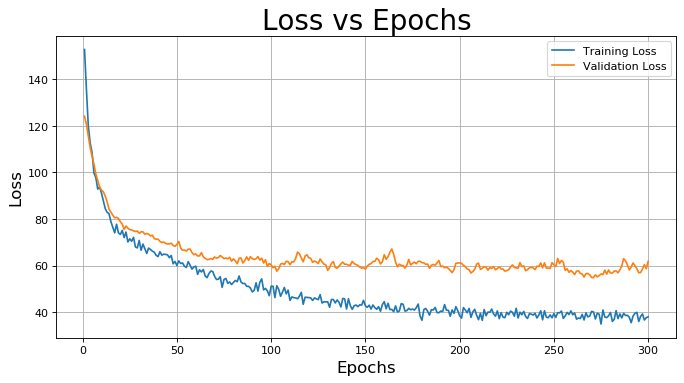

In [28]:
#plot the loss 
history_dict = hist.history
keys = history_dict.keys()
loss = history_dict['loss']
val_loss = history_dict['val_loss']
 
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Loss vs Epochs', fontsize = 25)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()

In [29]:
model_save=model.save("E:/ssl_speech_recognition/model.h5")

In [43]:
from keras import backend as K

def get_predictions_1(model_final,data_point,Actual_text):
    
    #print(data_point.shape[0])    
    # obtain and decode the acoustic model's predictions
    #model_final=deep_rnn_model(input_dim=114)
    model_final.load_weights("E:/ssl_speech_recognition/model.h5")
    #model.load_weights("E:/Deep_speech_recognition/save_model/test_final.h5")
    data_point=normalize_feature(data_point, eps=1e-14)
    prediction = model_final.predict(np.expand_dims(data_point, axis=0))
    print(prediction.shape)
    #print(prediction)
    #prediction = model()
    output_length = [model_final.output_length(data_point.shape[0])]
    print(output_length)
    
    pred_ints = (K.eval(K.ctc_decode(prediction,output_length)[0][0])).flatten().tolist()
    out=prediction
    #pred_ints = K.get_value(K.ctc_decode(out, input_length=np.ones(out.shape[0])*out.shape[1],
                         #greedy=True)[0][0])
    print(pred_ints)
    print('-'*80)
    print('Actual transcription:\n',Actual_text)
    print('-'*80)
    print('Predicted transcription:\n' + '\n' + ''.join(int_sequence_to_text(pred_ints)))
    print('-'*80)
    


In [46]:

get_predictions_1(model_1,mfcc_vec[1],labels[1])

(1, 34, 83)
[34]
[46, 50, 35, 81, 21, 51, 36, 46, 81, 12, 16, 36, 51, 46]
--------------------------------------------------------------------------------
Actual transcription:
 সান চিপস্ একপিস
--------------------------------------------------------------------------------
Predicted transcription:

সান চিপস একপিস
--------------------------------------------------------------------------------


In [47]:
#for unseen class
#unseen voice=
#get_predictions_1(model_1,mfcc_vec[5])